In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_excel('./data/TornadoData.xlsx', 'Tornado_MinData')
df.head()

,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,F-Scale
0,1984-07-05,1,AL,95,MARSHALL,TORNADO,25.0,K,1.0
1,1984-09-15,1,AL,39,COVINGTON,TORNADO,25.0,K,1.0
2,1984-10-15,1,AL,35,CONECUH,TORNADO,250.0,K,2.0
3,1984-11-10,1,AL,75,LAMAR,TORNADO,2.5,K,0.0
4,1984-11-10,1,AL,107,PICKENS,TORNADO,250.0,K,2.0


In [3]:
df.describe()

,State_Num,County_Num,Property_DMG,F-Scale
count,61139.000000,61139.000000,61139.000000,59179.000000
mean,29.231767,105.989728,53.071361,0.911692
std,15.025193,96.454845,112.945487,1.001490
min,1.000000,0.000000,0.000000,0.000000
25%,18.000000,39.000000,0.000000,0.000000
50%,28.000000,86.000000,2.500000,1.000000
75%,45.000000,137.000000,25.000000,1.000000
max,99.000000,810.000000,4410.000000,5.000000


In [4]:
df.dtypes

Date             datetime64[ns]
State_Num                 int64
State                    object
County_Num                int64
County_Name              object
Event                    object
Property_DMG            float64
Damage Factor            object
F-Scale                 float64
dtype: object

**Look for null or missing values in the data set**

In [5]:
df.isnull().sum()

Date                0
State_Num           0
State               0
County_Num          0
County_Name         2
Event               0
Property_DMG        0
Damage Factor    8825
F-Scale          1960
dtype: int64

#### Null or NA Values

Notice that the data set has a number of null values.  Lets look at some of null value records to see what we can and should do about these

In [6]:
df[df['F-Scale'].isnull()].head()

,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,F-Scale
91,1967-06-21,1,AL,59,FRANKLIN,TORNADO,250.0,K,NaN
222,1955-10-16,1,AL,45,DALE,TORNADO,2.5,K,NaN
223,1955-10-16,1,AL,31,COFFEE,TORNADO,2.5,K,NaN
349,1968-05-27,1,AL,53,ESCAMBIA,TORNADO,2.5,K,NaN
573,1969-04-18,1,AL,109,PIKE,TORNADO,250.0,K,NaN


In [7]:
df[df['Damage Factor'].isnull()].head()

,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,F-Scale
34769,1993-05-03,1,AL,43,CULLMAN,TORNADO,0.0,NaN,1.0
34772,1995-04-20,5,AR,3,ASHLEY,TORNADO,0.0,NaN,0.0
34774,1995-07-25,5,AR,1,ARKANSAS,TORNADO,0.0,NaN,0.0
34779,1995-07-11,4,AZ,5,COCONINO,TORNADO,0.0,NaN,NaN
34786,1993-01-18,4,AZ,21,PINAL,TORNADO,0.0,NaN,1.0


In [8]:
df[df['County_Name'].isnull()].head()

,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,F-Scale
7777,1975-11-26,15,HI,0,NaN,TORNADO,0.0,K,0.0
38757,1996-07-08,72,PR,37,NaN,TORNADO,15.0,K,0.0


In [9]:
print("Shape of dataframe BEFORE dropping NA Values")
df.shape

Shape of dataframe BEFORE dropping NA Values


(61139, 9)

In [10]:
print("Shape of dataframe AFTER dropping NA Values")
df.dropna(subset=['F-Scale','Damage Factor'], how='any').shape

Shape of dataframe AFTER dropping NA Values


(50392, 9)

**Drop the missing values in the F-Scale and 'Damage Factor' columns.  There does not appear to be a good way to recover this missing data**

In [11]:
df.dropna(subset=['F-Scale','Damage Factor'], how='any', inplace=True)

In [12]:
df.shape

(50392, 9)

In [13]:
# Check that there are no, important, NA values
df.isnull().sum()

Date             0
State_Num        0
State            0
County_Num       0
County_Name      2
Event            0
Property_DMG     0
Damage Factor    0
F-Scale          0
dtype: int64

In [14]:
df.dtypes

Date             datetime64[ns]
State_Num                 int64
State                    object
County_Num                int64
County_Name              object
Event                    object
Property_DMG            float64
Damage Factor            object
F-Scale                 float64
dtype: object

**Change the F-Scale from float64 to an integer**

In [15]:
df['F-Scale'] = df['F-Scale'].astype(np.int64)

In [16]:
df.dtypes

Date             datetime64[ns]
State_Num                 int64
State                    object
County_Num                int64
County_Name              object
Event                    object
Property_DMG            float64
Damage Factor            object
F-Scale                   int64
dtype: object

In [17]:
df.head()

,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,F-Scale
0,1984-07-05,1,AL,95,MARSHALL,TORNADO,25.0,K,1
1,1984-09-15,1,AL,39,COVINGTON,TORNADO,25.0,K,1
2,1984-10-15,1,AL,35,CONECUH,TORNADO,250.0,K,2
3,1984-11-10,1,AL,75,LAMAR,TORNADO,2.5,K,0
4,1984-11-10,1,AL,107,PICKENS,TORNADO,250.0,K,2


### Clean the Damage Factory column
look at all of the Damage Factor values and make sure we know what the values are.


In [18]:
#df[~((df['Damage Factor']=='M') | (df['Damage Factor']=='K') | (df['Damage Factor']=='B'))]
df['Damage Factor'].unique()

array(['K', 'M', 0, 'm', 5, 6, 1, 7, 'B'], dtype=object)

In [19]:
# Look at the shape before removing bad Damage Factor Data
df.shape

(50392, 9)

In [20]:
# only keep the columns for K, M and B
df = df[(df['Damage Factor'] == 'K') | (df['Damage Factor'] == 'M') | (df['Damage Factor'] == 'B')]
df.head()
df.shape

(50370, 9)

In [21]:
# verify that we no longer 
df['Damage Factor'].unique()

array(['K', 'M', 'B'], dtype=object)

In [22]:
# look at the Event data to make sure we know the the data is.
df['Event'].unique()

array(['TORNADO'], dtype=object)

In [23]:
# Make sure we know the set of values for F-Scale
df['F-Scale'].unique()

array([1, 2, 0, 3, 4, 5])

In [24]:
df[df['Damage Factor'] == 'B']

,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,F-Scale
58843,2011-04-27,1,AL,125,TUSCALOOSA,TORNADO,1.5,B,4
59117,2011-04-27,1,AL,83,LIMESTONE,TORNADO,1.0,B,4


In [25]:
# create a column with an actual numeric property damage value include factor:
# e.g. 25.0. K = 25000
def calculate_property_damage(row):
    multiplier = 1000
    if row['Damage Factor'] == 'M':
        multiplier = 1000000
    elif row['Damage Factor'] == 'B':
        multiplier = 10000000
        
    return row['Property_DMG'] * multiplier


In [26]:
# for each row, call the calculate_property_damage function.
# axis=1 means start at the top of the dataframe and go does, (row by row)
# and pass the row to the function.
df['Property_Damage'] = df.apply(calculate_property_damage, axis=1)
df['Property_Damage_Mil'] = df['Property_Damage'].apply(lambda x: x/1000000.0)


In [27]:
# add a month column to the data set
df['Month'] = df['Date'].apply(lambda d: d.month)
df['Year'] =  df['Date'].apply(lambda d: d.year)

In [28]:
df.head()

,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,F-Scale,Property_Damage,Property_Damage_Mil,Month,Year
0,1984-07-05,1,AL,95,MARSHALL,TORNADO,25.0,K,1,25000.0,0.0250,7,1984
1,1984-09-15,1,AL,39,COVINGTON,TORNADO,25.0,K,1,25000.0,0.0250,9,1984
2,1984-10-15,1,AL,35,CONECUH,TORNADO,250.0,K,2,250000.0,0.2500,10,1984
3,1984-11-10,1,AL,75,LAMAR,TORNADO,2.5,K,0,2500.0,0.0025,11,1984
4,1984-11-10,1,AL,107,PICKENS,TORNADO,250.0,K,2,250000.0,0.2500,11,1984


### Encode the F-Scale column

Encode the F-Scale column from a single column with F-Scale values, to one column for each of the F-Scale values and encode such that there is a 1 for the corresponding F-Scale value and a zero every where else.

In [29]:
# create F-Scale encoding
# One Hot Encoding
# Represent categorical variables as binary vectors
df = pd.concat([df['F-Scale'], pd.get_dummies(df, prefix=['F-Scale'], columns=['F-Scale'],sparse=False)], axis=1)
df.head()

,F-Scale,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,Property_Damage,Property_Damage_Mil,Month,Year,F-Scale_0,F-Scale_1,F-Scale_2,F-Scale_3,F-Scale_4,F-Scale_5
0,1,1984-07-05,1,AL,95,MARSHALL,TORNADO,25.0,K,25000.0,0.0250,7,1984,0,1,0,0,0,0
1,1,1984-09-15,1,AL,39,COVINGTON,TORNADO,25.0,K,25000.0,0.0250,9,1984,0,1,0,0,0,0
2,2,1984-10-15,1,AL,35,CONECUH,TORNADO,250.0,K,250000.0,0.2500,10,1984,0,0,1,0,0,0
3,0,1984-11-10,1,AL,75,LAMAR,TORNADO,2.5,K,2500.0,0.0025,11,1984,1,0,0,0,0,0
4,2,1984-11-10,1,AL,107,PICKENS,TORNADO,250.0,K,250000.0,0.2500,11,1984,0,0,1,0,0,0


### Create bins for each of the damage values.

Start with 250k buckets.



In [30]:
# https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin



In [31]:
# Binning age:
cut_points = list(range(100000,50000000, 100000))
bin_labels = [f"damage_bin_{i}" for i in cut_points]
df["Damage_Bin"] = binning(df["Property_Damage"], cut_points[0:-1], bin_labels)
#print( pd.value_counts(df["Damage_Bin"], sort=False) )


In [32]:
df['Damage_Bin'].unique()

[damage_bin_100000, damage_bin_300000, damage_bin_2500000, damage_bin_25000000, damage_bin_49900000, ..., damage_bin_11200000, damage_bin_19500000, damage_bin_7100000, damage_bin_9200000, damage_bin_8600000]
Length: 141
Categories (141, object): [damage_bin_100000 < damage_bin_200000 < damage_bin_300000 < damage_bin_400000 ... damage_bin_45500000 < damage_bin_45700000 < damage_bin_46000000 < damage_bin_49900000]

In [33]:
df.head(200)

,F-Scale,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,Property_Damage,Property_Damage_Mil,Month,Year,F-Scale_0,F-Scale_1,F-Scale_2,F-Scale_3,F-Scale_4,F-Scale_5,Damage_Bin
0,1,1984-07-05,1,AL,95,MARSHALL,TORNADO,25.00,K,25000.0,0.02500,7,1984,0,1,0,0,0,0,damage_bin_100000
1,1,1984-09-15,1,AL,39,COVINGTON,TORNADO,25.00,K,25000.0,0.02500,9,1984,0,1,0,0,0,0,damage_bin_100000
2,2,1984-10-15,1,AL,35,CONECUH,TORNADO,250.00,K,250000.0,0.25000,10,1984,0,0,1,0,0,0,damage_bin_300000
3,0,1984-11-10,1,AL,75,LAMAR,TORNADO,2.50,K,2500.0,0.00250,11,1984,1,0,0,0,0,0,damage_bin_100000
4,2,1984-11-10,1,AL,107,PICKENS,TORNADO,250.00,K,250000.0,0.25000,11,1984,0,0,1,0,0,0,damage_bin_300000
5,2,1984-11-10,1,AL,125,TUSCALOOSA,TORNADO,250.00,K,250000.0,0.25000,11,1984,0,0,1,0,0,0,damage_bin_300000
6,1,1984-11-10,1,AL,103,MORGAN,TORNADO,25.00,K,25000.0,0.02500,11,1984,0,1,0,0,0,0,damage_bin_100000
7,1,1984-11-10,1,AL,27,CLAY,TORNADO,25.00,K,25000.0,0.02500,11,1984,0,1,0,0,0,0,damage_bin_100000
8,1,1984-11-10,1,AL,111,RANDOLPH,TORNADO,250.00,K,250000.0,0.25000,11,1984,0,1,0,0,0,0,damage_bin_300000
9,0,1985-01-31,1,AL,1,AUTAUGA,TORNADO,0.03,K,30.0,0.00003,1,1985,1,0,0,0,0,0,damage_bin_100000


## Data is Prepared and we are ready for Visualizations

At this point we have performed the following:

- read in data set
- removed na F-Scale
- removed na Damage Factor
- Calculated Property Damage
- Calculated Property Damage in Millions
- Created F-Scale encoding


In [34]:
df_ca = df[df['State']=='CA']
df_ca.describe()

,F-Scale,State_Num,County_Num,Property_DMG,Property_Damage,Property_Damage_Mil,Month,Year,F-Scale_0,F-Scale_1,F-Scale_2,F-Scale_3,F-Scale_4,F-Scale_5
count,290.000000,290.0,290.000000,290.000000,2.900000e+02,290.000000,290.000000,290.000000,290.000000,290.000000,290.00000,290.000000,290.0,290.0
mean,0.455172,6.0,56.803448,51.422897,3.736865e+05,0.373687,5.506897,1990.448276,0.637931,0.275862,0.07931,0.006897,0.0,0.0
std,0.670478,0.0,29.601143,113.098828,2.162490e+06,2.162490,3.830530,14.531165,0.481429,0.447720,0.27069,0.082902,0.0,0.0
min,0.000000,6.0,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1951.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
25%,0.000000,6.0,32.500000,0.030000,3.000000e+01,0.000030,2.250000,1982.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
50%,0.000000,6.0,59.000000,2.500000,5.000000e+03,0.005000,4.000000,1992.000000,1.000000,0.000000,0.00000,0.000000,0.0,0.0
75%,1.000000,6.0,73.000000,25.000000,5.000000e+04,0.050000,9.000000,2001.750000,1.000000,1.000000,0.00000,0.000000,0.0,0.0
max,3.000000,6.0,115.000000,800.000000,2.500000e+07,25.000000,12.000000,2012.000000,1.000000,1.000000,1.00000,1.000000,0.0,0.0


In [35]:
# By state, look at aggregate loss and tornado count

df_state_agg = df.groupby(['State'], axis=0)['Property_Damage_Mil'].agg(['sum', 'mean', 'max', 'count'])
df_state_agg.head()

,sum,mean,max,count
State,,,,
AK,0.00000,0.000000,0.0,2
AL,3847.61331,1.830454,700.0,2102
AR,2579.63981,1.709503,150.0,1509
AZ,47.86746,0.314917,25.0,152
CA,108.36909,0.373687,25.0,290


In [36]:
df_state_count_desc = df_state_agg.sort_values(by = ['count'], ascending=False)
df_state_count_desc.index

Index(['TX', 'OK', 'KS', 'FL', 'AL', 'MS', 'IA', 'NE', 'MO', 'LA', 'IL', 'GA',
       'AR', 'IN', 'MN', 'CO', 'TN', 'WI', 'SD', 'NC', 'OH', 'MI', 'ND', 'KY',
       'SC', 'PA', 'VA', 'WY', 'NM', 'NY', 'MD', 'CA', 'MT', 'MA', 'AZ', 'ID',
       'NJ', 'WV', 'ME', 'WA', 'UT', 'CT', 'NH', 'OR', 'DE', 'NV', 'VT', 'HI',
       'PR', 'RI', 'AK', 'DC'],
      dtype='object', name='State')

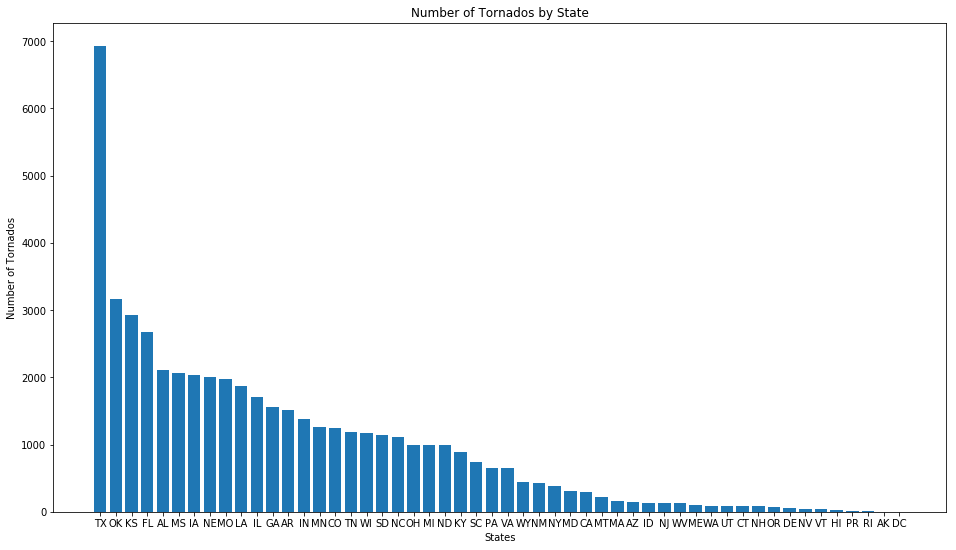

In [37]:
# Bar plot of Number of Tornados per State

y_pos = np.arange(len(df_state_count_desc.index))

plt.figure(figsize=(16,9))
plt.bar(y_pos, df_state_count_desc['count'], label='Tornado Count')
plt.xlabel('States')
plt.xticks(y_pos, df_state_count_desc.index)

plt.ylabel('Number of Tornados')
plt.title('Number of Tornados by State')

plt.show()

In [38]:
df_state_mean_desc = df_state_agg.sort_values(by = ['mean'], ascending=False)
df_state_mean_desc.head()

,sum,mean,max,count
State,,,,
CT,596.22659,7.183453,250.0,83
MA,528.44187,3.431441,250.0,154
PA,1796.38690,2.767931,250.0,649
OH,2284.41529,2.286702,250.0,999
UT,174.75542,2.105487,170.0,83


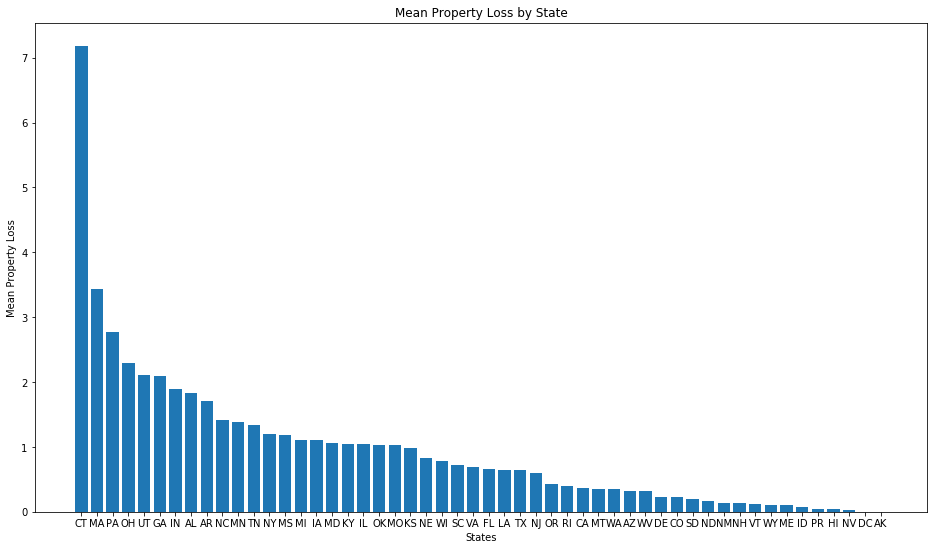

In [39]:
# Bar plot of Number of Tornados per State

y_pos = np.arange(len(df_state_mean_desc.index))

plt.figure(figsize=(16,9))
plt.bar(y_pos, df_state_mean_desc['mean'], label='Mean Loss')
plt.xlabel('States')
plt.xticks(y_pos, df_state_mean_desc.index)

plt.ylabel('Mean Property Loss')
plt.title('Mean Property Loss by State')

plt.show()

In [40]:
df_state_fscale = df.groupby(['State'], axis=0)['F-Scale'].agg(['sum', 'mean', 'max', 'count'])
df_state_mean_fscale = df_state_fscale.sort_values(by = ['mean'], ascending=False)
df_state_mean_fscale.head()

#df.groupby(['State'], axis=0)['F-Scale','Property_Damage'].mean()

,sum,mean,max,count
State,,,,
KY,1288,1.447191,5,890
AR,2109,1.397614,4,1509
IN,1885,1.369913,5,1376
CT,112,1.349398,4,83
MS,2736,1.327511,5,2061


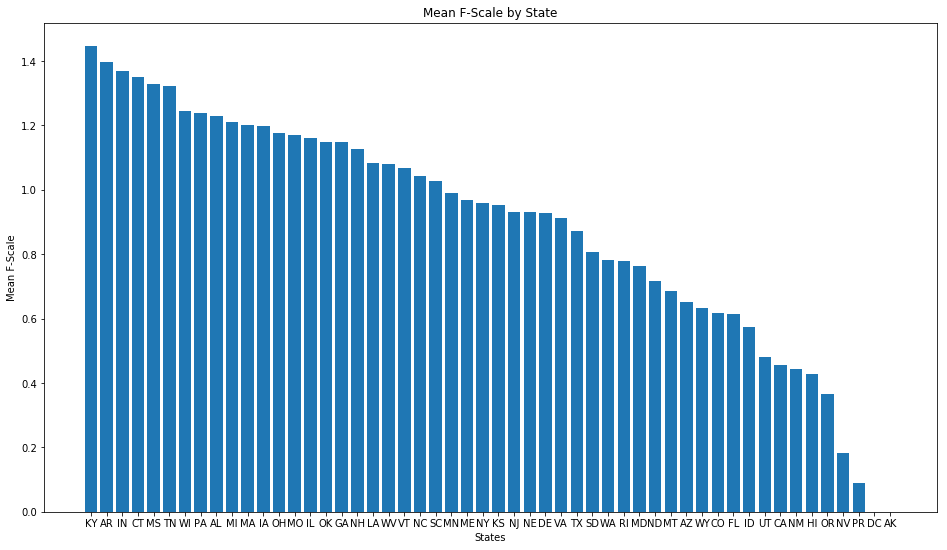

In [41]:
# Bar plot of mean tornado strength by State.  Which state has, the worst average tornados

y_pos = np.arange(len(df_state_mean_fscale.index))

plt.figure(figsize=(16,9))
plt.bar(y_pos, df_state_mean_fscale['mean'], label='Mean Loss')
plt.xlabel('States')
plt.xticks(y_pos, df_state_mean_fscale.index)

plt.ylabel('Mean F-Scale')
plt.title('Mean F-Scale by State')

plt.show()

In [42]:
df[df['State']=='AK']

,F-Scale,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,Property_Damage,Property_Damage_Mil,Month,Year,F-Scale_0,F-Scale_1,F-Scale_2,F-Scale_3,F-Scale_4,F-Scale_5,Damage_Bin
48161,0,2004-06-14,2,AK,155,KUSKOKWIM DELTA,TORNADO,0.0,K,0.0,0.0,6,2004,1,0,0,0,0,0,damage_bin_100000
48162,0,2004-06-18,2,AK,155,KUSKOKWIM DELTA,TORNADO,0.0,K,0.0,0.0,6,2004,1,0,0,0,0,0,damage_bin_100000


In [43]:
df[df['State']=='DC']

,F-Scale,Date,State_Num,State,County_Num,County_Name,Event,Property_DMG,Damage Factor,Property_Damage,Property_Damage_Mil,Month,Year,F-Scale_0,F-Scale_1,F-Scale_2,F-Scale_3,F-Scale_4,F-Scale_5,Damage_Bin
44437,0,2001-09-24,11,DC,1,DISTRICT OF COLUMBIA,TORNADO,2.0,K,2000.0,0.002,9,2001,1,0,0,0,0,0,damage_bin_100000


y=1.981756x+(-1.008983)


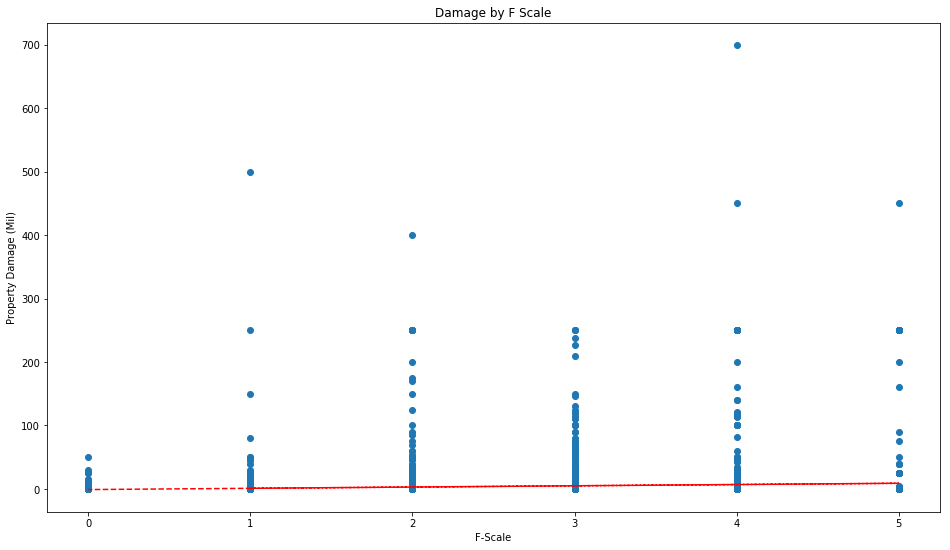

In [44]:
# Scatter plot of the F-Scale of the Tornado vs the Property Damage
plt.figure(figsize=(16,9))
x = df['F-Scale']
y = df['Property_Damage_Mil']
plt.scatter(x,y)
plt.xlabel('F-Scale')
plt.ylabel('Property Damage (Mil)')
plt.title('Damage by F Scale')

# add a trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))


plt.show()

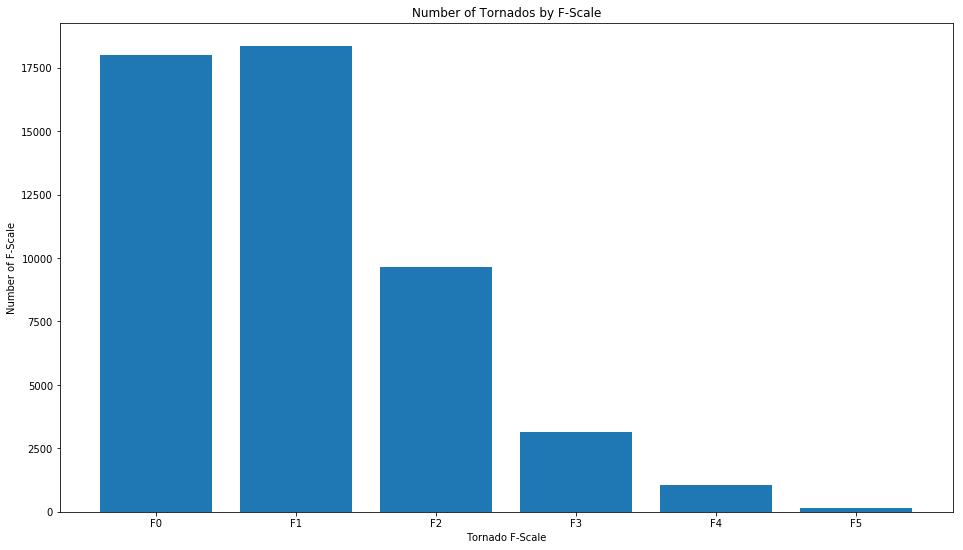

In [45]:
# look at overall tornado count
lf0 = df['F-Scale_0'].sum()
lf1 = df['F-Scale_1'].sum()
lf2 = df['F-Scale_2'].sum()
lf3 = df['F-Scale_3'].sum()
lf4 = df['F-Scale_4'].sum()
lf5 = df['F-Scale_5'].sum()

plt.figure(figsize=(16,9))
plt.bar(['F0', 'F1', 'F2', 'F3', 'F4', 'F5'], [lf0, lf1, lf2, lf3, lf4, lf5], label='Tornado Count')
plt.xlabel('Tornado F-Scale')
plt.ylabel('Number of F-Scale')
plt.title('Number of Tornados by F-Scale')

plt.show()

In [46]:
# group the data by year
#df.groupby(df['Date'].dt.year, axis=0)['Property_Damage'].agg(['sum', 'mean', 'max', 'count'])
#Group by F-Scale and Damage in Mil
df_f_scale = df.groupby(df['F-Scale'], axis=0)['Property_Damage_Mil'].agg(['sum', 'mean', 'max', 'count']).reset_index()


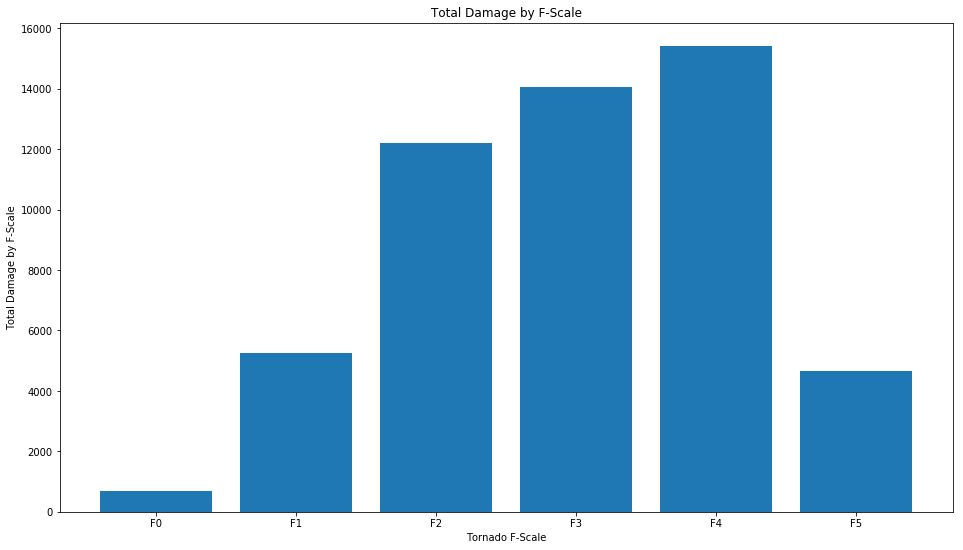

In [47]:
# look at total damage by f-scale
lf0 = df_f_scale[df_f_scale['F-Scale']==0]['sum'].iloc[0]
lf1 = df_f_scale[df_f_scale['F-Scale']==1]['sum'].iloc[0]
lf2 = df_f_scale[df_f_scale['F-Scale']==2]['sum'].iloc[0]
lf3 = df_f_scale[df_f_scale['F-Scale']==3]['sum'].iloc[0]
lf4 = df_f_scale[df_f_scale['F-Scale']==4]['sum'].iloc[0]
lf5 = df_f_scale[df_f_scale['F-Scale']==5]['sum'].iloc[0]

plt.figure(figsize=(16,9))
plt.bar(['F0', 'F1', 'F2', 'F3', 'F4', 'F5'], [lf0, lf1, lf2, lf3, lf4, lf5])
plt.xlabel('Tornado F-Scale')
plt.ylabel('Total Damage by F-Scale')
plt.title('Total Damage by F-Scale')

plt.show()

In [48]:
# reset_index makes the Date column part of the Dataframe instead of the index
df2 = df.groupby(df['Date'].dt.year, axis=0)['Property_Damage_Mil'].agg(['sum', 'mean', 'max','count']).reset_index()
df2.head()

,Date,sum,mean,max,count
0,1950,34.40415,0.158544,2.5,217
1,1951,65.19715,0.283466,25.0,230
2,1952,93.77224,0.360662,25.0,260
3,1953,595.88586,1.309639,250.0,455
4,1954,85.73045,0.150669,25.0,569


y=0.018172x+(-35.056698)


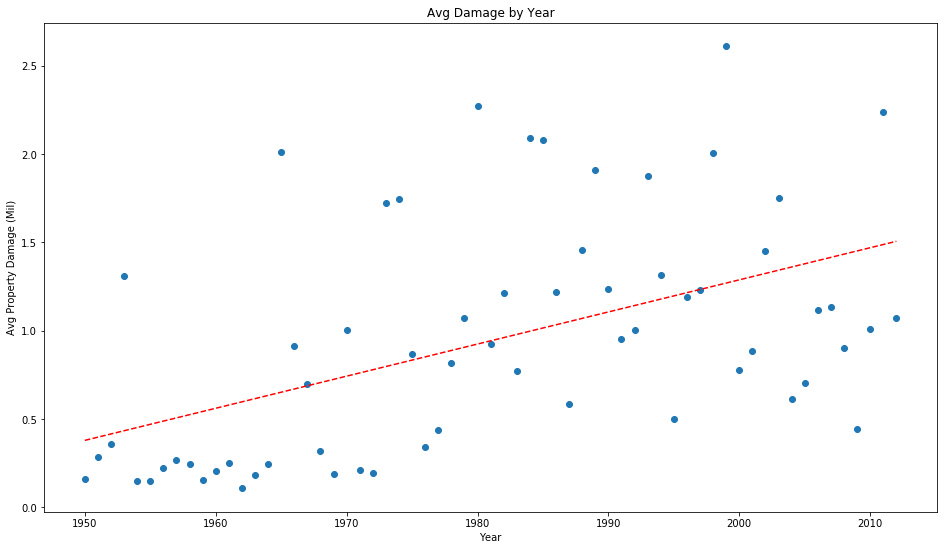

In [49]:
# Mean property damage by year
x = df2['Date']
y = df2['mean']

plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Avg Property Damage (Mil)')
plt.title('Avg Damage by Year')

# add a trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

plt.show()

y=9.357047x+(-17736.786002)


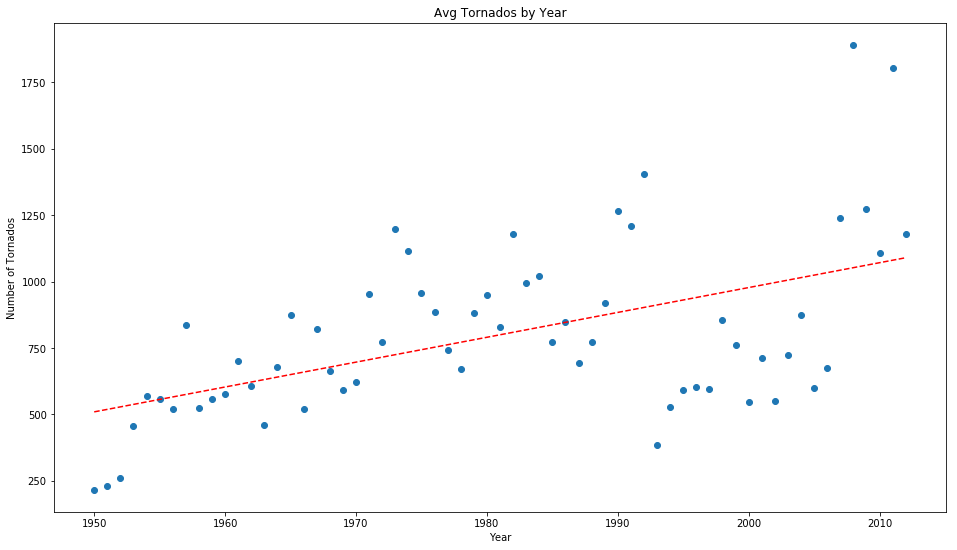

In [50]:
# Number of tornados per year
x = df2['Date']
y = df2['count']

plt.figure(figsize=(16,9))
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Number of Tornados')
plt.title('Avg Tornados by Year')

# add a trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))


plt.show()

In [51]:
# 
# reset_index makes the Date column part of the Dataframe instead of the index
df2 = df.groupby(df['Date'].dt.year, axis=0)['F-Scale_0','F-Scale_1','F-Scale_2','F-Scale_3','F-Scale_4','F-Scale_5'].agg(['sum', 'mean', 'max', 'count']).reset_index()
df2.head()

Date F-Scale_0                     F-Scale_1                     F-Scale_2  \
              sum      mean max count       sum      mean max count       sum   
0  1950      13.0  0.059908   1   217      84.0  0.387097   1   217      75.0   
1  1951      25.0  0.108696   1   230      88.0  0.382609   1   230      84.0   
2  1952      26.0  0.100000   1   260      84.0  0.323077   1   260      81.0   
3  1953      49.0  0.107692   1   455     146.0  0.320879   1   455     154.0   
4  1954      72.0  0.126538   1   569     210.0  0.369069   1   569     214.0   

   ...  F-Scale_3       F-Scale_4                     F-Scale_5                \
   ...        max count       sum      mean max count       sum      mean max   
0  ...          1   217        12  0.055300   1   217         0  0.000000   0   
1  ...          1   230         7  0.030435   1   230         0  0.000000   0   
2  ...          1   260        26  0.100000   1   260         0  0.000000   0   
3  ...          1   455        39  0.085714   1   455         8  0.017582   1   
4  ...          1   569        16  0.028120   1   569         0  0.000000   0   

         
  count  
0   217  
1   230  
2   260  
3   455  
4   569  

[5 rows x 25 columns]

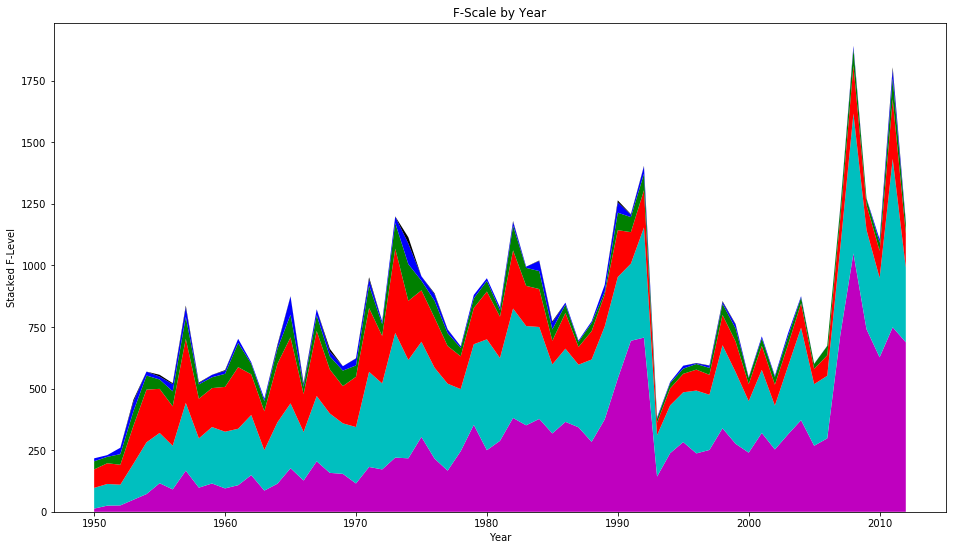

In [52]:
# Create a stackplot of all of the different F-Level tornados across all of the years.
x = df2['Date']
f0 = df2['F-Scale_0']['sum']
f1 = df2['F-Scale_1']['sum']
f2 = df2['F-Scale_2']['sum']
f3 = df2['F-Scale_3']['sum']
f4 = df2['F-Scale_4']['sum']
f5 = df2['F-Scale_5']['sum']

plt.figure(figsize=(16,9))
plt.stackplot(x, f0,f1,f2,f3,f4,f5,colors=['m','c','r','g','b','k'])
plt.xlabel('Year')
plt.ylabel('Stacked F-Level')
plt.title('F-Scale by Year')

plt.show()

## Monthly Analysis

In [53]:
# group the data by month
df_month = df.groupby(df['Date'].dt.month, axis=0)['Property_Damage_Mil'].agg(['sum', 'mean', 'max', 'count'])
#df_month['count']

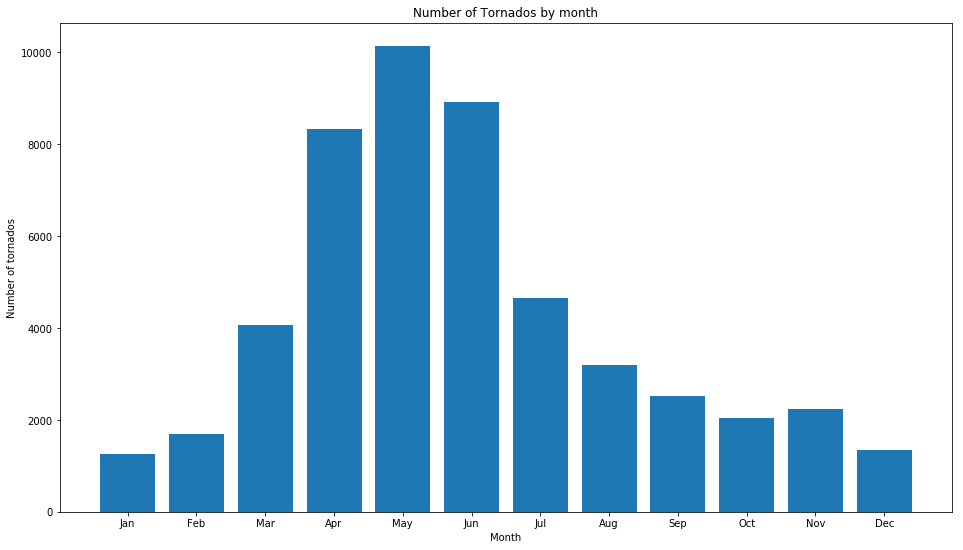

In [54]:
month_names = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
y_pos = np.arange(len(month_names))

plt.figure(figsize=(16,9))
plt.bar(y_pos,df_month['count'] , label='Tornado Count')
plt.xlabel('Month')
plt.ylabel('Number of tornados')
plt.xticks(y_pos, month_names)

plt.title('Number of Tornados by month')

plt.show()

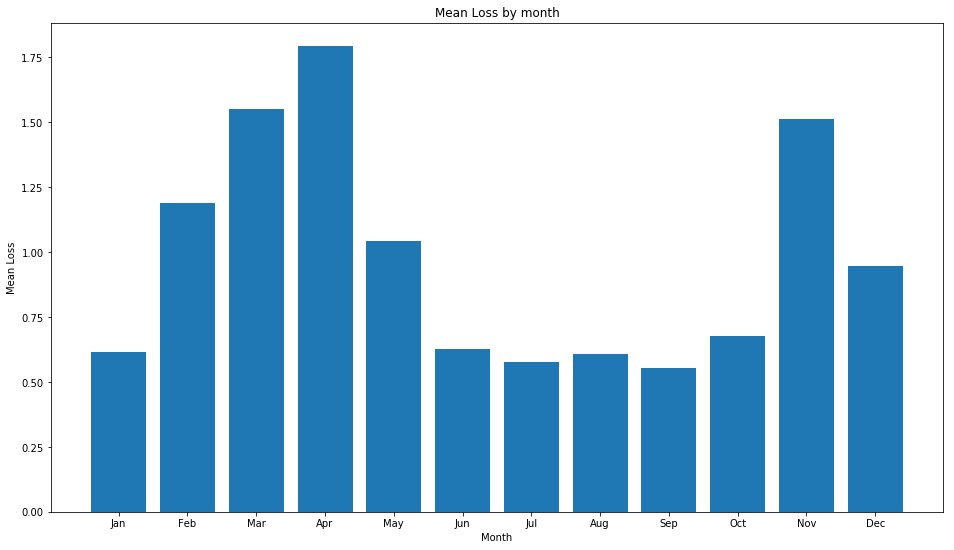

In [55]:
# Monthly Loss
plt.figure(figsize=(16,9))
plt.bar(y_pos,df_month['mean'] , label='Tornado Count')
plt.xlabel('Month')
plt.ylabel('Mean Loss')
plt.xticks(y_pos, month_names)

plt.title('Mean Loss by month')

plt.show()

In [56]:
df_year_month = df.groupby([df['Date'].dt.year, df['Date'].dt.month], axis=0)['Property_Damage_Mil'].agg(['sum', 'mean', 'max', 'count'])
df_year_month['count']
print(len(df_year_month))

746


In [57]:
# create a list of x_labels that just contains the year
seen_year = {}
x_labels = []
for y_m in df_year_month.index.tolist():
    if y_m[0] in seen_year:
        x_labels.append('')
    else:
        x_labels.append(y_m[0])
        seen_year[y_m[0]]=y_m[0]
        
#print(x_labels)


y=0.067850x+(42.246100)


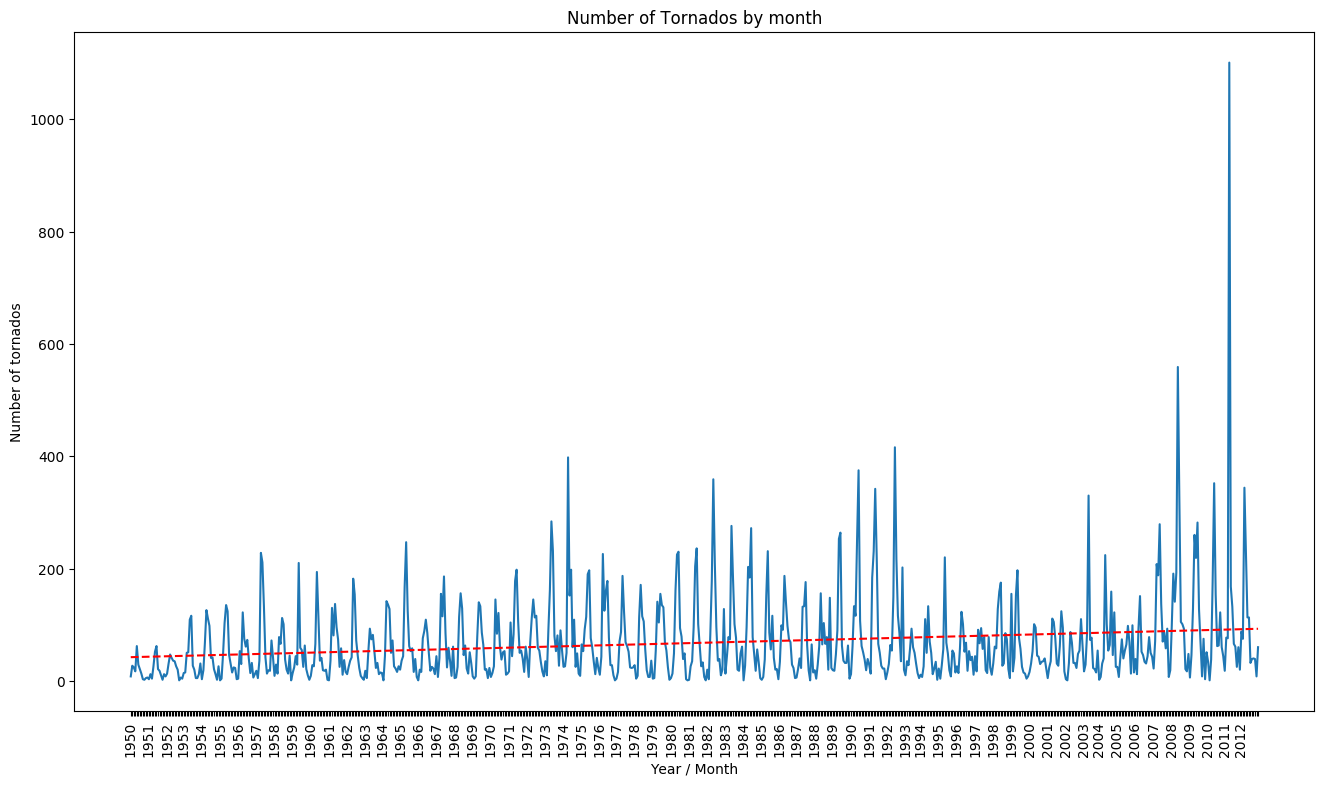

In [58]:
fig, axes = plt.subplots(1, 1, figsize=(16, 9), dpi=100)

x = range(len(df_year_month))
y = df_year_month['count']
axes.plot(x, y)

axes.set_xlabel('Year / Month')
axes.set_ylabel('Number of tornados')
axes.set_xticks(range(len(df_year_month)))
axes.set_xticklabels(x_labels, rotation=90)
axes.set_title('Number of Tornados by month')

# add a trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))



plt.show()

y=0.001130x+(0.314077)


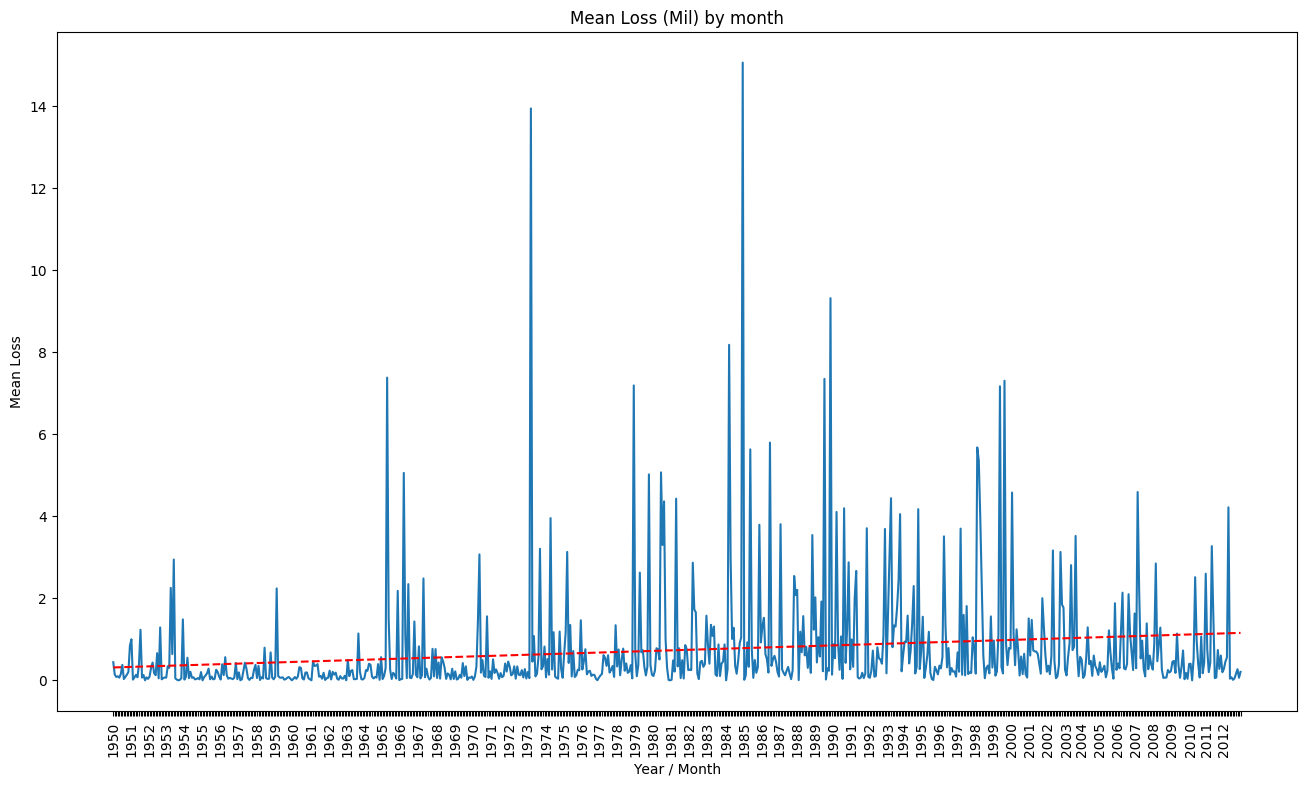

In [59]:
fig, axes = plt.subplots(1, 1, figsize=(16, 9), dpi=100)

x = range(len(df_year_month))
y = df_year_month['mean']
axes.plot(x, y)

axes.set_xlabel('Year / Month')
axes.set_ylabel('Mean Loss')
axes.set_xticks(range(len(df_year_month)))
axes.set_xticklabels(x_labels, rotation=90)
axes.set_title('Mean Loss (Mil) by month')

# add a trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))



plt.show()

reset the df_year_month data frame index so year and month are seperate columns

In [60]:
# convert multilevel index (Date-Year => Date-Month) to two columns of Year and Month
df_year_month.index = df_year_month.index.set_names(['Year','Month'])
df_year_month.reset_index(inplace=True)

In [61]:
print("Year / Month view of Total, Mean and Max Loss in Millions and number of Tornados")
df_year_month.head(12)

Year / Month view of Total, Mean and Max Loss in Millions and number of Tornados


,Year,Month,sum,mean,max,count
0,1950,1,3.52750,0.440937,2.50,8
1,1950,2,3.75500,0.139074,0.25,27
2,1950,3,1.96000,0.081667,0.25,24
3,1950,4,1.68500,0.099118,0.25,17
4,1950,5,4.08556,0.065896,0.25,62
5,1950,6,4.44506,0.153278,2.50,29
6,1950,7,7.91050,0.376690,2.50,21
7,1950,8,0.40775,0.031365,0.25,13
8,1950,9,0.25275,0.084250,0.25,3
9,1950,10,0.27500,0.137500,0.25,2


In [62]:
# create a column which is the number of seconds from the first timestamped record
# essentially create an EPOCH of 1950 January, and creating a timedelta from that baseline.
def year_month_ts(row, min_datetime):
    year = int(row['Year'])
    month = int(row['Month'])
    day = 1

    ts = (dt.datetime(year,month,day) - min_datetime).total_seconds()
    return ts

    # (dt.datetime(year,month,day) - dt.datetime(1900,1,1)).total_seconds()

min_dt = dt.datetime(df_year_month['Year'].min(), df_year_month['Month'].min(), 1)

df_year_month['Year_Month_TS'] = df_year_month.apply(year_month_ts, axis=1, min_datetime = min_dt)


In [63]:
df_year_month.head(12)

,Year,Month,sum,mean,max,count,Year_Month_TS
0,1950,1,3.52750,0.440937,2.50,8,0.0
1,1950,2,3.75500,0.139074,0.25,27,2678400.0
2,1950,3,1.96000,0.081667,0.25,24,5097600.0
3,1950,4,1.68500,0.099118,0.25,17,7776000.0
4,1950,5,4.08556,0.065896,0.25,62,10368000.0
5,1950,6,4.44506,0.153278,2.50,29,13046400.0
6,1950,7,7.91050,0.376690,2.50,21,15638400.0
7,1950,8,0.40775,0.031365,0.25,13,18316800.0
8,1950,9,0.25275,0.084250,0.25,3,20995200.0
9,1950,10,0.27500,0.137500,0.25,2,23587200.0


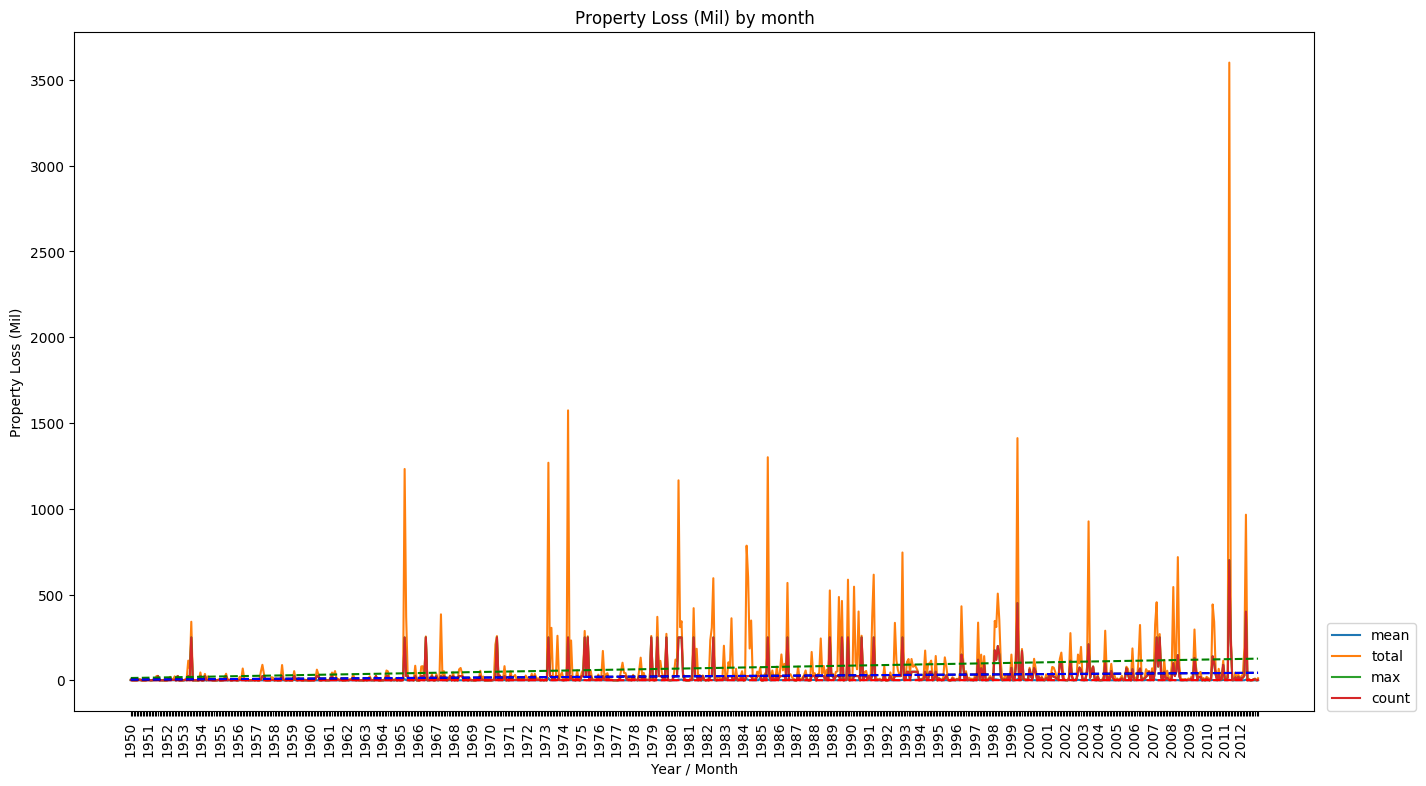

In [64]:
fig, axes = plt.subplots(1, 1, figsize=(16, 9), dpi=100)

x = range(len(df_year_month))
y_mean = df_year_month['mean']
y_sum = df_year_month['sum']
y_max = df_year_month['max']
y_count = df_year_month['max']

axes.plot(x, y_mean, label='mean')
axes.plot(x, y_sum, label='total')
axes.plot(x, y_max, label='max')
axes.plot(x, y_count, label='count')

axes.set_xlabel('Year / Month')
axes.set_ylabel('Property Loss (Mil)')
axes.set_xticks(range(len(df_year_month)))
axes.set_xticklabels(x_labels, rotation=90)
axes.set_title('Property Loss (Mil) by month')

# add a trend line
z_mean = np.polyfit(x, y_mean, 1)
p_mean = np.poly1d(z_mean)
plt.plot(x,p_mean(x),"r--")

z_sum = np.polyfit(x, y_sum, 1)
p_sum = np.poly1d(z_sum)
plt.plot(x,p_sum(x),"g--")

z_max = np.polyfit(x, y_max, 1)
p_max = np.poly1d(z_max)
plt.plot(x,p_max(x),"k--")

z_count = np.polyfit(x, y_count, 1)
p_count = np.poly1d(z_count)
plt.plot(x,p_count(x),"b--")



plt.legend(loc=(1.01,0))
plt.show()


## Prepare for Modeling


In [65]:
# f(state num, county num, month, f-Scale) = predicted loss
model_data = df[['Month','State_Num', 'County_Num', 'F-Scale_0', 'F-Scale_1', 'F-Scale_2', 'F-Scale_3', 'F-Scale_4', 'F-Scale_5']]
model_data.head()

,Month,State_Num,County_Num,F-Scale_0,F-Scale_1,F-Scale_2,F-Scale_3,F-Scale_4,F-Scale_5
0,7,1,95,0,1,0,0,0,0
1,9,1,39,0,1,0,0,0,0
2,10,1,35,0,0,1,0,0,0
3,11,1,75,1,0,0,0,0,0
4,11,1,107,0,0,1,0,0,0


In [66]:
model_target = df[['Damage_Bin']]
model_target.head()

,Damage_Bin
0,damage_bin_100000
1,damage_bin_100000
2,damage_bin_300000
3,damage_bin_100000
4,damage_bin_300000


In [67]:
X_train, X_test, y_train, y_test = train_test_split(model_data, model_target, random_state=123)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37777, 9)
(37777, 1)
(12593, 9)
(12593, 1)


In [68]:
# Instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model
knn.fit(X_train, y_train.values.ravel())

# Score the model on the unseen test data set
score = knn.score(X_test, y_test)
print(f"Testing Score: {score}")

# Predict on new data
#new_data = np.array([[5, 2.9, 1, 0.2]])
#prediction = knn.predict(new_data)
#print(f"Prediction: {prediction[0]}")
#print(f"Predicted target name: {iris_dataset['target_names'][prediction]}")

Testing Score: 0.6432144842372747


In [69]:
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
#confusion_matrix(y_test, y_pred)
#classification_report(y_test, y_pred)

0.6432144842372747


In [70]:
# Predict on new data
new_data = np.array([[4, 1, 39, 0, 0, 0, 0, 0,1]])
prediction = knn.predict(new_data)
print(f"KNN Prediction: {prediction[0]}")


KNN Prediction: damage_bin_1500000


In [71]:
tree = DecisionTreeClassifier(max_depth=4, random_state=123)
tree.fit(X_train, y_train)
score = tree.score(X_test,y_test)
print(f"Testing Score: {score}")
y_pred = tree.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

Testing Score: 0.7338203763995871
0.7338203763995871


In [72]:
# Predict on new data
new_data = np.array([[4, 1, 39, 0, 0, 1, 0, 0, 0]])
prediction = tree.predict(new_data)
print(f"Decision Tree Prediction: {prediction[0]}")

Decision Tree Prediction: damage_bin_100000
